## EXPLORATORY DATA ANALYSIS OF THE HOTEL BOOKING DATASET
--------------------
###### About the data set:

No. of features = 119390

No. of observations = 32

Features =['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','agent','company','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests','reservation_status','reservation_status_date']

### Data Preparation and Cleaning

In [155]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [156]:
# read the dataset and convert to DataFrame

df = pd.read_csv('booking_of_hotel.csv')
data = df.copy() # make a copy of the original dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [157]:
# size of the dataset

data.shape

(119390, 32)

In [158]:
# statistical summary of the dataset

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [159]:
# what are the features in the dataset?

columns = list(data.columns)
columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [160]:
# check for missing values

data.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [161]:
# check percentage of missing values in each column

percentage_of_missing_values = (df.isnull().sum() / df.shape[0]) * 100
percentage_of_missing_values.sort_values(ascending=False)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [162]:
# check data types(to determine how to handle missing values)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [163]:
# replace null values in 'children' column with 0 
# If data['children'] is null, then most likely, no children spent the night

data['children'].replace(np.nan, 0, inplace=True)
data['children'].isnull().sum()

0

In [164]:
# replace null values in the 'country' column with the most common value(MODE)

data['country'].fillna(data.country.mode().to_string(), inplace=True)
data['country'].isnull().sum()

0

In [165]:
# replace null values in the 'agent' column with 0(if agent value NaN, then the booking was made without an agent)

data['agent'].fillna(0.0, inplace=True)
data['agent'].isnull().sum()

0

In [166]:
# drop the 'company' because the % of missing values is too high, and currently we might not use it in the analysis

data.drop('company', axis=1, inplace=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [167]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [168]:
# some rows have the adult, babies and children columns empty.

data[(data.adults+data.babies+data.children)==0].shape

(180, 31)

In [169]:
# We can deduce that there were no actual guests for the 180 observations, 
# so we can drop those bookings(observations) since the dataset is very large

data = data.drop(data[(data.adults + data.babies + data.children)==0].index)
data.shape

(119210, 31)

In [170]:
# Number of children and agent should be integer but they are of float datatype. Thus, we cast the values to integer(int)

data[['children', 'agent']] = data[['children', 'agent']].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

### Data Exploration

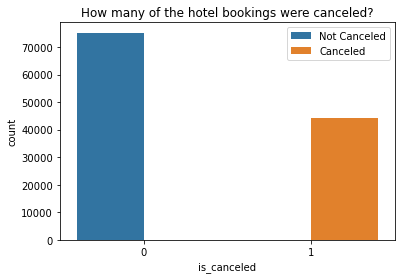

In [179]:
data['is_canceled'].replace([0,1], ['Not Canceled', 'Canceled'], inplace=True)

plt.title('How many of the hotel bookings were canceled?')
sns.countplot(data=df, x='is_canceled', hue='is_canceled')
plt.legend(labels=['Not Canceled', 'Canceled'])
plt.show()

In [177]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not Canceled,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not Canceled,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Not Canceled,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Not Canceled,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Not Canceled,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [195]:
# how many types of hotels are in the “hotel” column?

data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [199]:
# No of bookings which were not canceled
uncanceled_bookings = data[data['is_canceled'] == 'Not Canceled']
uncanceled_bookings.shape

(75011, 31)

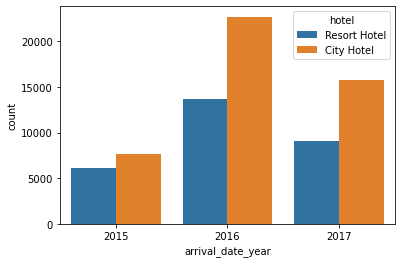

In [198]:
# Percentage of bookings by year and by hotel
plt.subplots(figsize=(6,4))
sns.countplot(x='arrival_date_year', hue='hotel',  data=uncanceled_bookings);

In [ ]:
# Distribution of bookings by Hotel
x,y = uncanceled_bookings['hotel'].value_counts()

plt.hist(x, y, data=uncanceled_bookings)
plt.xlabel("Hotels")
plt.ylabel("Total Booking (percentage)")
plt.title("Distribution of bookings by Hotel Types", fontweight='semibold')


Text(0.5, 1.0, 'Distribution of bookings by Hotel Types')

In [182]:
# what are the categories of 'customer_type'

data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [183]:
# what are the different 'countries' in which the hotels are located?

data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', '0    PRT', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'K

In [188]:
countries_with_high_bookings = data.country.value_counts().head(15)
countries_with_high_bookings


PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
USA     2093
CHE     1726
CN      1279
AUT     1263
SWE     1020
Name: country, dtype: int64

<AxesSubplot:title={'center':'Distribution of bookings by Country Code'}, ylabel='country'>

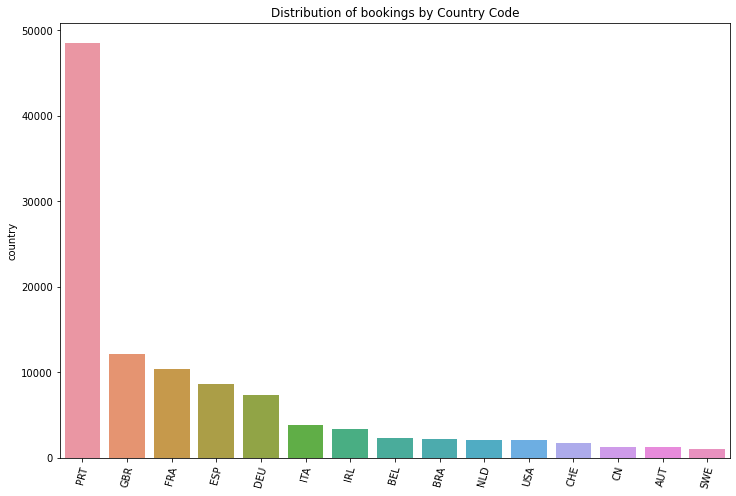

In [189]:
# Distribution  of bookings by Country
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title('Distribution of bookings by Country Code')

sns.barplot(x=countries_with_high_bookings.index, y=countries_with_high_bookings)


In [ ]:
""" We can see from the above that Portugal has the highest number of bookings"""

In [184]:
# what are the categories of 'distribution_channel'
data['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [210]:
# what are the categories of 'market_segment'
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

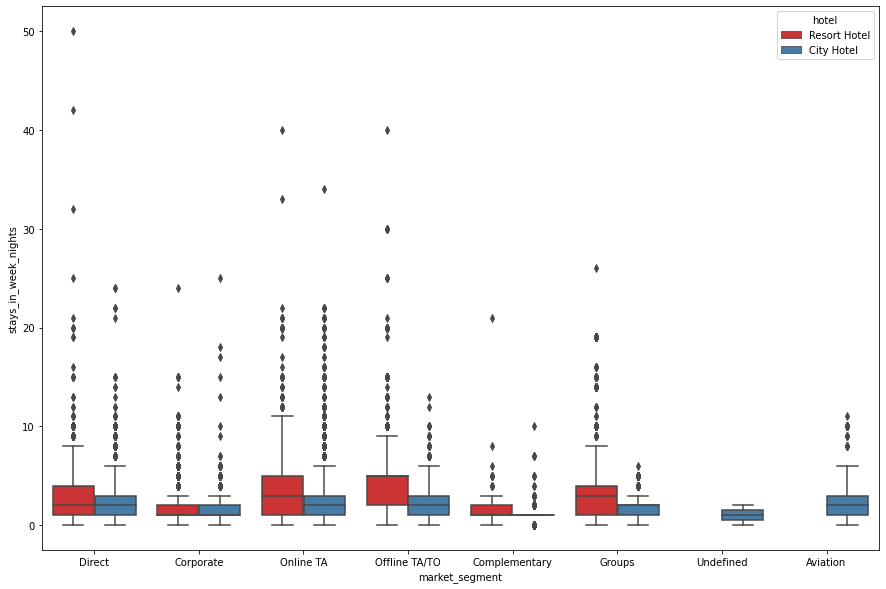

In [217]:
# Does the market segment of the client affect how long they book at hotels?
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = 'Set1');

In [207]:
# what are the categories of 'reserved_room_type'
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)